# Gaussian Mixture Models $\,\, \tiny\text{Analysis: Fortune 500 Diversity}$
<img src="graphic main 02.jpg" align=left />

<br>
### About the Business Situation & Data
___

Discussion ...

<br>
### Setup for Computation
___

In [1]:
# Load some required functions
library(e1071,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(caret,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(ggplot2,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(gridExtra, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(rgl,       verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) # All rglwidget() calls must use elementID="myplot"
library(htmltools, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(pracma, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUEpracma)
library(reshape2, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUEreshape2)

options(warn=-1)
set.seed(12345)

# Set some visualization constants
PALETTE = c("dodgerblue2", "brown3", "chartreuse3", "darkgoldenrod", "mediumorchid3")
theme.x_axis_only = theme(axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank(), panel.grid.major.y=element_blank(), panel.grid.minor.y=element_blank())


# Set some visualization formatting defaults
options(digits=10, scipen=100) # expose many digits, use scientific notation sparingly
options(rgl.useNULL=TRUE)
options(repr.matrix.max.cols=250)
options(repr.plot.width=8, repr.plot.height=2.75)
theme_set(theme_grey())
update_geom_defaults("point", list(size=3, colour=PALETTE[1]))
#update_geom_defaults("line", list(size=0.15))
update_geom_defaults("bar", list(colour=PALETTE[1], fill=PALETTE[1]))
#update_geom_defaults("density", list(colour=PALETTE[1], fill=PALETTE[1]))
#update_stat_defaults("density", list(colour=PALETTE[1], fill=PALETTE[1]))
#update_geom_defaults("text", list(size=2.5))
#update_geom_defaults("abline", list(color="black", size=0.15))
#update_geom_defaults("smooth", list(color="black", size=0.15))
update_geom_defaults("area", list(color=NA, fill=PALETTE[1]))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

<br>
### Data Retrieval
___

In [2]:
data = read.csv("../DATASETS/DATASET F500 Diversity.csv")
dim(data)
head(data)

[1] 500 212

f500.2017.rank name               data.avail
1 1              Wal-Mart Stores    Partial   
2 2              Berkshire Hathaway N         
3 3              Apple              Y         
4 4              Exxon Mobil        N         
5 5              McKesson           N         
6 6              UnitedHealth Group N         
  data.url                                                                                                  
1 https://cdn.corporate.walmart.com/8c/08/6bc1b69f4a94a423957d4c2162db/wm-cdireport2016-v27-reader-pages.pdf
2 n/a                                                                                                       
3 https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                 
4 n/a                                                                                                       
5 n/a                                                                                                       
6 n/a                                                                                                       
  diversity.pg.url                                                                                                       
1 http://corporate.walmart.com/our-story/working-at-walmart                                                              
2 n/a                                                                                                                    
3 https://www.apple.com/diversity/                                                                                       
4 http://corporate.exxonmobil.com/en/community/corporate-citizenship-report/safety-and-health-and-the-workplace/diversity
5 http://www.mckesson.com/about-mckesson/corporate-citizenship/diversity-and-inclusion/                                  
6 http://www.unitedhealthgroup.com/About/Diversity.aspx                                                                  
  data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
1 2015      n/a           n/a         n/a    n/a      n/a    n/a    n/a   
2 n/a       n/a           n/a         n/a    n/a      n/a    n/a    n/a   
3 2016      7/1/2016      7/31/2016   2      411      799    1709   2562  
4 n/a       n/a           n/a         n/a    n/a      n/a    n/a    n/a   
5 n/a       n/a           n/a         n/a    n/a      n/a    n/a    n/a   
6 n/a       n/a           n/a         n/a    n/a      n/a    n/a    n/a   
  HISPM5 HISPM6 HISPM7 HISPM8 HISPM9 HISPM10 HISPM11 HISPF1 HISPF1_2 HISPF2
1 n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a    n/a      n/a   
2 n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a    n/a      n/a   
3 672    13     0      0      132    6300    5774    0      149      382   
4 n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a    n/a      n/a   
5 n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a    n/a      n/a   
6 n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a    n/a      n/a   
  HISPF3 HISPF4 HISPF5 HISPF6 HISPF7 HISPF8 HISPF9 HISPF10 HISPF11 WHM1 WHM1_2
1 n/a    n/a    n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a  n/a   
2 n/a    n/a    n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a  n/a   
3 617    1260   666    0      0      0      97     3171    2746    73   3903  
4 n/a    n/a    n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a  n/a   
5 n/a    n/a    n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a  n/a   
6 n/a    n/a    n/a    n/a    n/a    n/a    n/a    n/a     n/a     n/a  n/a   
  WHM2 WHM3 WHM4 WHM5 WHM6 WHM7 WHM8 WHM9 WHM10 WHM11 BLKM1 BLKM1_2 BLKM2 BLKM3
1 n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a   n/a   n/a   n/a     n/a   n/a  
2 n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a   n/a   n/a   n/a     n/a   n/a  
3 9012 7646 8414 57   0    0    0    68   31121 31135 2     172     273   1382 
4 n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a   n/a   n/a   n/a     n/a   n/a  
5 n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a  n/a 

In [3]:
str(data)

'data.frame':	500 obs. of  212 variables:
 $ f500.2017.rank  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name            : Factor w/ 500 levels "3M","A-Mark Precious Metals",..: 474 72 44 178 300 459 132 202 54 192 ...
 $ data.avail      : Factor w/ 3 levels "N","Partial",..: 2 1 3 1 1 1 1 1 1 1 ...
 $ data.url        : Factor w/ 101 levels "http://2015csr.hormelfoods.com/people/diversity/",..: 52 101 57 101 101 101 101 101 101 101 ...
 $ diversity.pg.url: Factor w/ 432 levels "http://about.att.com/sites/diversity",..: 25 432 284 20 153 201 239 330 1 233 ...
 $ data.year       : Factor w/ 5 levels "","2015","2016",..: 2 5 3 5 5 5 5 5 5 5 ...
 $ PAYROLL_START   : Factor w/ 10 levels "7/1/2016","7/10/2016",..: 10 10 1 10 10 10 10 10 10 10 ...
 $ PAYROLL_END     : Factor w/ 10 levels "7/1/2015","7/23/2016",..: 10 10 4 10 10 10 10 10 10 10 ...
 $ HISPM1          : Factor w/ 12 levels "0","1","18","2",..: 12 12 4 12 12 12 12 12 12 12 ...
 $ HISPM1_2        : Factor w/ 16 levels "100","106","1401",..

In [4]:
data = read.csv("../DATASETS/DATASET F500 Diversity.csv", na.strings="n/a")
dim(data)
head(data)

[1] 500 212

f500.2017.rank name               data.avail
1 1              Wal-Mart Stores    Partial   
2 2              Berkshire Hathaway N         
3 3              Apple              Y         
4 4              Exxon Mobil        N         
5 5              McKesson           N         
6 6              UnitedHealth Group N         
  data.url                                                                                                  
1 https://cdn.corporate.walmart.com/8c/08/6bc1b69f4a94a423957d4c2162db/wm-cdireport2016-v27-reader-pages.pdf
2 NA                                                                                                        
3 https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                 
4 NA                                                                                                        
5 NA                                                                                                        
6 NA                                                                                                        
  diversity.pg.url                                                                                                       
1 http://corporate.walmart.com/our-story/working-at-walmart                                                              
2 NA                                                                                                                     
3 https://www.apple.com/diversity/                                                                                       
4 http://corporate.exxonmobil.com/en/community/corporate-citizenship-report/safety-and-health-and-the-workplace/diversity
5 http://www.mckesson.com/about-mckesson/corporate-citizenship/diversity-and-inclusion/                                  
6 http://www.unitedhealthgroup.com/About/Diversity.aspx                                                                  
  data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
1 2015      NA            NA          NA      NA       NA      NA     NA  
2   NA      NA            NA          NA      NA       NA      NA     NA  
3 2016      7/1/2016      7/31/2016    2     411      799    1709   2562  
4   NA      NA            NA          NA      NA       NA      NA     NA  
5   NA      NA            NA          NA      NA       NA      NA     NA  
6   NA      NA            NA          NA      NA       NA      NA     NA  
  HISPM5 HISPM6 HISPM7 HISPM8 HISPM9 HISPM10 HISPM11 HISPF1 HISPF1_2 HISPF2
1  NA    NA     NA     NA      NA      NA      NA    NA      NA       NA   
2  NA    NA     NA     NA      NA      NA      NA    NA      NA       NA   
3 672    13      0      0     132    6300    5774     0     149      382   
4  NA    NA     NA     NA      NA      NA      NA    NA      NA       NA   
5  NA    NA     NA     NA      NA      NA      NA    NA      NA       NA   
6  NA    NA     NA     NA      NA      NA      NA    NA      NA       NA   
  HISPF3 HISPF4 HISPF5 HISPF6 HISPF7 HISPF8 HISPF9 HISPF10 HISPF11 WHM1 WHM1_2
1  NA      NA    NA    NA     NA     NA     NA       NA      NA    NA     NA  
2  NA      NA    NA    NA     NA     NA     NA       NA      NA    NA     NA  
3 617    1260   666     0      0      0     97     3171    2746    73   3903  
4  NA      NA    NA    NA     NA     NA     NA       NA      NA    NA     NA  
5  NA      NA    NA    NA     NA     NA     NA       NA      NA    NA     NA  
6  NA      NA    NA    NA     NA     NA     NA       NA      NA    NA     NA  
  WHM2 WHM3 WHM4 WHM5 WHM6 WHM7 WHM8 WHM9 WHM10 WHM11 BLKM1 BLKM1_2 BLKM2 BLKM3
1   NA   NA   NA NA   NA   NA   NA   NA      NA    NA NA     NA      NA     NA 
2   NA   NA   NA NA   NA   NA   NA   NA      NA    NA NA     NA      NA     NA 
3 9012 7646 8414 57    0    0    0   68   31121 31135  2    172     273   1382 
4   NA   NA   NA NA   NA   NA   NA   NA      NA    NA NA     NA      NA     NA 
5   NA   NA   NA NA   NA   NA   NA   NA      N

In [5]:
str(data)

'data.frame':	500 obs. of  212 variables:
 $ f500.2017.rank  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name            : Factor w/ 500 levels "3M","A-Mark Precious Metals",..: 474 72 44 178 300 459 132 202 54 192 ...
 $ data.avail      : Factor w/ 3 levels "N","Partial",..: 2 1 3 1 1 1 1 1 1 1 ...
 $ data.url        : Factor w/ 100 levels "http://2015csr.hormelfoods.com/people/diversity/",..: 52 NA 57 NA NA NA NA NA NA NA ...
 $ diversity.pg.url: Factor w/ 431 levels "http://about.att.com/sites/diversity",..: 25 NA 284 20 153 201 239 330 1 233 ...
 $ data.year       : int  2015 NA 2016 NA NA NA NA NA NA NA ...
 $ PAYROLL_START   : Factor w/ 9 levels "7/1/2016","7/10/2016",..: NA NA 1 NA NA NA NA NA NA NA ...
 $ PAYROLL_END     : Factor w/ 9 levels "7/1/2015","7/23/2016",..: NA NA 4 NA NA NA NA NA NA NA ...
 $ HISPM1          : int  NA NA 2 NA NA NA NA NA NA NA ...
 $ HISPM1_2        : int  NA NA 411 NA NA NA NA NA NA NA ...
 $ HISPM2          : int  NA NA 799 NA NA NA NA NA NA NA ...
 $ HISPM

In [6]:
ok = complete.cases(data[,9:212])
data.ok = data[ok,]
dim(data.ok)
data.ok

[1]  14 212

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
3   2016      7/1/2016      7/31/2016    2      411      799   1709   25

In [9]:
library(mclust)

m = Mclust(data.ok[, 9:200], G=2)
#summary(m, parameters=TRUE)
#m$parameters


#plot(m, what="classification")
#str(m)
data.ok$class = m$classification
data.ok

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
3   2016      7/1/2016      7/31/2016    2      411      799   1709   25

<br>
Note, Amazon & Costco are different from the rest.

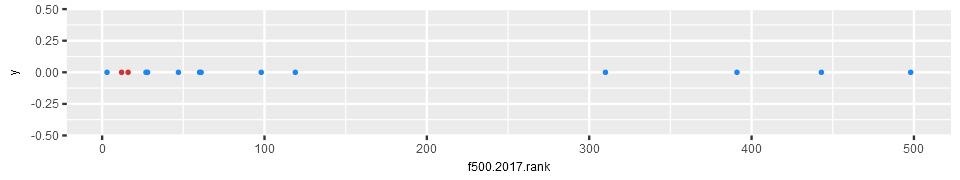

In [10]:
gaussian = function(x, mean, sd) { (1/(sd*sqrt(2*pi))) * exp(-0.5 * ((x-mean)/sd)^2) }

options(repr.plot.width=8, repr.plot.height=1.5)

#mean.1 = unname(m$parameters$mean["PRICE",1])
#sd.1 = sqrt(m$parameters$variance$sigmasq[1])
#mean.2 = unname(m$parameters$mean["PRICE",2])
#sd.2 = sqrt(m$parameters$variance$sigmasq[2])

p1 = ggplot(data.ok) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none") # +
#geom_vline(aes(xintercept=m$parameters$mean["PRICE",1])) +
#geom_vline(aes(xintercept=m$parameters$mean["PRICE",2]))

#p2 = ggplot(data.ok) + xlim(0, 10000000) +
#stat_function(fun=gaussian, args=c(mean=mean.1, sd=sd.1), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
#stat_function(fun=gaussian, args=c(mean=mean.2, sd=sd.2), n=500, geom="area", fill=PALETTE[2], alpha=0.3)


#grid.arrange(p1, p2, nrow=1)
p1

    
#ggplot(data.ok) + geom_jitter(aes(x=BEDS, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=BATHS, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=SQUARE.FEET, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=DAYS.ON.MARKET, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=HOA.MONTH, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=LATITUDE, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only
#ggplot(data.ok) + geom_jitter(aes(x=LONGITUDE, y=0, color=factor(class)), size=0.5) + scale_color_manual(values=PALETTE, guide="none") + theme.x_axis_only



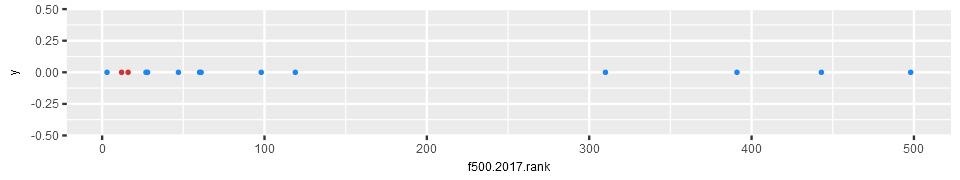

In [11]:
# Just gender
m = Mclust(data.ok[,177:200], G=2)
data.ok$class = m$classification

p1 = ggplot(data.ok) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none")

p1

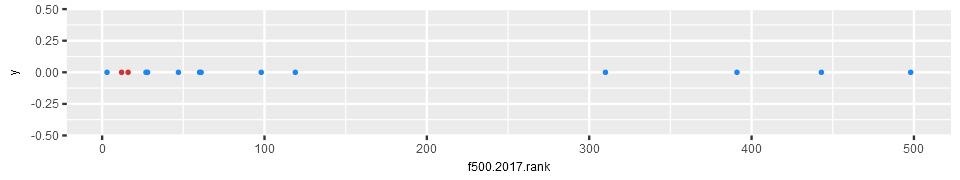

In [12]:
# Just race
m = Mclust(data.ok[,9:176], G=2)
data.ok$class = m$classification

p1 = ggplot(data.ok) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none")

p1

In [13]:
this_year = c(9:19, 21:31, 33:43, 45:55, 57:67, 69:79, 81:91, 93:103, 105:115, 117:127, 129:139, 141:151, 153:163, 165:175, 177:187, 189:199)
previous_year = c(20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 200)

data.ok.prop = data.ok

for (i in this_year) data.ok.prop[, this_year] = data.ok[,this_year] / data.ok[,"TOTAL10"]
for (i in previous_year) data.ok.prop[, previous_year] = data.ok[,previous_year] / data.ok[,"TOTAL11"]

data.ok.prop

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1            HISPM1_2      
3   2016      7/1/2016      7/31/2016   0.000025909420665 0.005324385947
12 

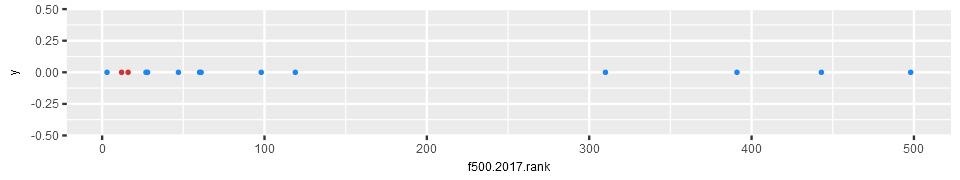

In [14]:
# Proportions
m = Mclust(data.ok.prop[,9:200], G=2)
data.ok.prop$class = m$classification

p1 = ggplot(data.ok.prop) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none")

p1

In [15]:
library(reshape2)
data.melt = melt(data.ok.prop[,c(2,213,9:200)], id=c("name","class"))
data.melt

name               class variable value            
1    Apple              1     HISPM1   0.000025909420665
2    Amazon.com         2     HISPM1   0.000005729312884
3    Costco Wholesale   2     HISPM1   0.000028099556729
4    Alphabet           1     HISPM1   0.000000000000000
5    Microsoft          1     HISPM1   0.000116790594464
6    Intel              1     HISPM1   0.000018472337674
7    Cisco Systems      1     HISPM1   0.000106592762351
8    HP                 1     HISPM1   0.000401934831118
9    Facebook           1     HISPM1   0.001065593180204
10   Qualcomm           1     HISPM1   0.002273609493706
11   eBay               1     HISPM1   0.000302526092876
12   Jones Lang LaSalle 1     HISPM1   0.000180554301706
13   Adobe Systems      1     HISPM1   0.000455857772375
14   Yahoo              1     HISPM1   0.000676132521974
15   Apple              1     HISPM1_2 0.005324385946730
16   Amazon.com         2     HISPM1_2 0.002801634000034
17   Costco Wholesale   2     HISPM1_2 0.009841869744505
18   Alphabet           1     HISPM1_2 0.008252427184466
19   Microsoft          1     HISPM1_2 0.006287227001985
20   Intel              1     HISPM1_2 0.005948092731135
21   Cisco Systems      1     HISPM1_2 0.004796674305815
22   HP                 1     HISPM1_2 0.004199525994096
23   Facebook           1     HISPM1_2 0.002604783329387
24   Qualcomm           1     HISPM1_2 0.005878112349581
25   eBay               1     HISPM1_2 0.004991680532446
26   Jones Lang LaSalle 1     HISPM1_2 0.004468718967229
27   Adobe Systems      1     HISPM1_2 0.006685913994834
28   Yahoo              1     HISPM1_2 0.002974983096687
29   Apple              1     HISPM2   0.010350813555809
30   Amazon.com         2     HISPM2   0.004526157177970
...  ...                ...   ...      ...              
2659 Adobe Systems      1     MT9      0.0000000000     
2660 Yahoo              1     MT9      0.0000000000     
2661 Apple              1     MT10     0.6925069955     
2662 Amazon.com         2     MT10     0.5893457698     
2663 Costco Wholesale   2     MT10     0.5650680361     
2664 Alphabet           1     MT10     0.6689320388     
2665 Microsoft          1     MT10     0.9418577491     
2666 Intel              1     MT10     0.7404451833     
2667 Cisco Systems      1     MT10     0.7376485637     
2668 HP                 1     MT10     0.6701223822     
2669 Facebook           1     MT10     0.7005683164     
2670 Qualcomm           1     MT10     0.7958742306     
2671 eBay               1     MT10     0.6410527908     
2672 Jones Lang LaSalle 1     MT10     0.6684120249     
2673 Adobe Systems      1     MT10     0.6877374259     
2674 Yahoo              1     MT10     0.6897903989     
2675 Apple              1     MT11     0.6999613761     
2676 Amazon.com         2     MT11     0.6140787330     
2677 Costco Wholesale   2     MT11     0.5652037709     
2678 Alphabet           1     MT11     0.6749358675     
2679 Microsoft          1     MT11     0.9454424207     
2680 Intel              1     MT11     0.7551411609     
2681 Cisco Systems      1     MT11     0.7404582255     
2682 HP                 1     MT11     0.6693052002     
2683 Facebook           1     MT11     0.7118087242     
2684 Qualcomm           1     MT11     0.7905744867     
2685 eBay               1     MT11     0.5683241252     
2686 Jones Lang LaSalle 1     MT11     0.6757500688     
2687 Adobe Systems      1     MT11     0.6881137826     
2688 Yahoo              1     MT11     0.6813521751

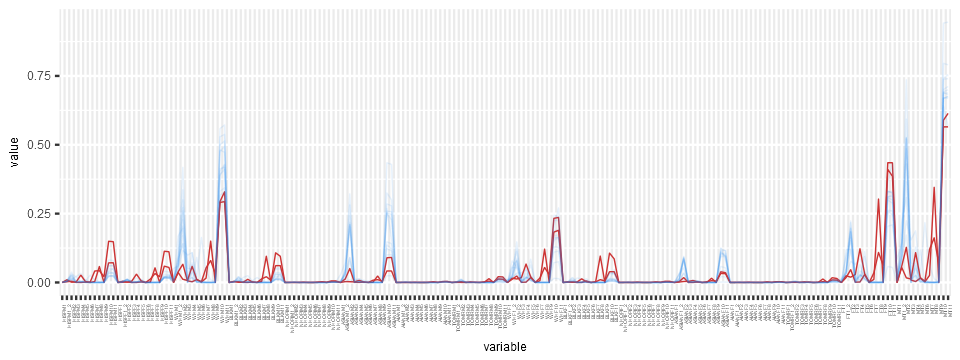

In [16]:
options(repr.plot.width=8, repr.plot.height=3)


ggplot(data.melt) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, alpha=factor(class)), size=0.3) +
scale_color_manual(values=PALETTE, guide="none") +
scale_alpha_manual(values=c(0.1, 1), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=2.5))

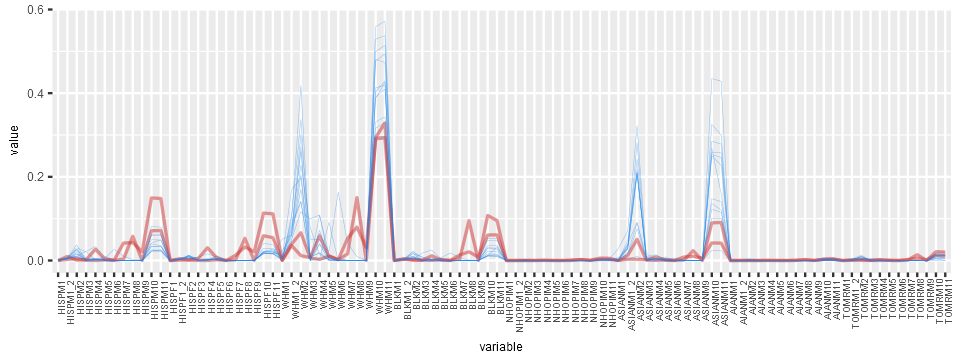

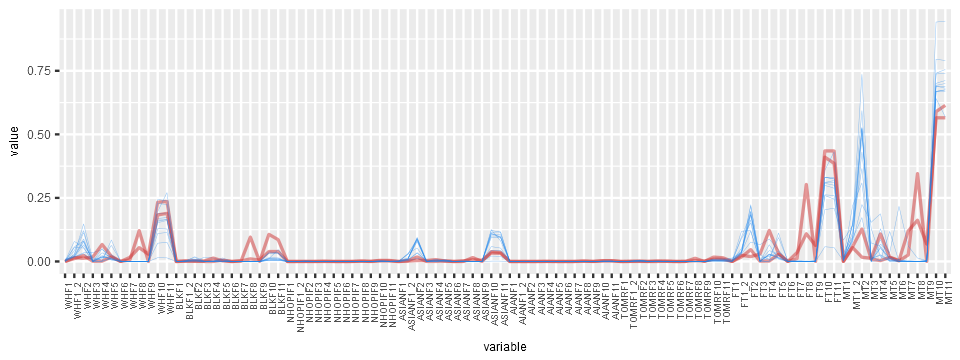

In [17]:
data.melt.1 = melt(data.ok.prop[,c(2,213,9:104)], id=c("name","class"))
data.melt.2 = melt(data.ok.prop[,c(2,213,105:200)], id=c("name","class"))


ggplot(data.melt.1) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, size=factor(class)), alpha=0.5) +
scale_color_manual(values=PALETTE, guide="none") +
scale_size_manual(values=c(0.1, 0.7), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=5))

ggplot(data.melt.2) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, size=factor(class)), alpha=0.5) +
scale_color_manual(values=PALETTE, guide="none") +
scale_size_manual(values=c(0.1, 0.7), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=5))

Red: higher HISPM10,11 HISPF10,11 BLKM8,10,11 WHF10,11 FT10,11 --- lower WHM10,11 ASIANM2,10,11 ASIANF2,10,11 MT2,10,11 
warehouses!

In [52]:
upper_mgmt = grep("^[A-Z]*1$", names(data.ok))[1:16]
middle_mgmt = grep("^[A-Z]*1_2$", names(data.ok))[1:16]
mgmt = c(upper_mgmt, middle_mgmt)

upper_mgmt
middle_mgmt
mgmt



[1]   9  21  33  45  57  69  81  93 105 117 129 141 153 165 177 189

[1]  10  22  34  46  58  70  82  94 106 118 130 142 154 166 178 190

[1]   9  21  33  45  57  69  81  93 105 117 129 141 153 165 177 189  10  22  34
[20]  46  58  70  82  94 106 118 130 142 154 166 178 190

In [70]:
data.upper_mgmt.prop = cbind(data.ok[, 1:8], data.ok[, upper_mgmt]/data.ok[,"TOTAL1"])
dim(data.upper_mgmt.prop)
data.upper_mgmt.prop


data.middle_mgmt.prop = cbind(data.ok[, 1:8], data.ok[, middle_mgmt]/data.ok[,"TOTAL1_2"])
dim(data.middle_mgmt.prop)
data.middle_mgmt.prop

[1] 14 24

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1         HISPF1        
3   2016      7/1/2016      7/31/2016   0.018691588785 0.000000000000
12  2016 

[1] 14 24

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1_2      HISPF1_2     
3   2016      7/1/2016      7/31/2016   0.05009140768 0.01815965874
12  2016     

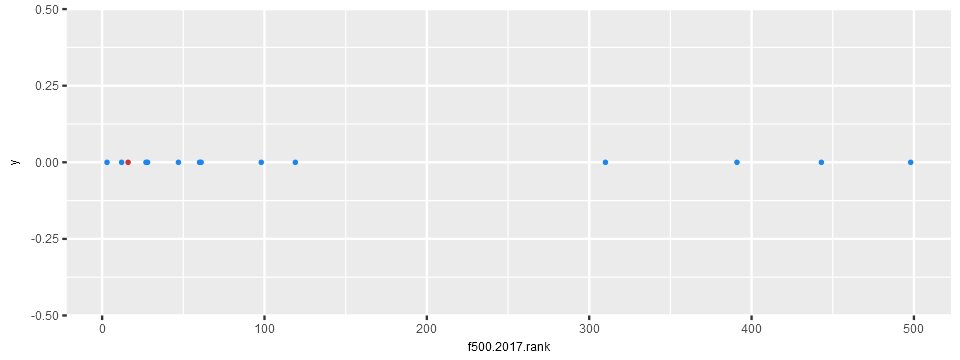

In [75]:
m = Mclust(data.upper_mgmt.prop[, 9:24], G=2)
data.upper_mgmt.prop$class = m$classification

p1 = ggplot(data.upper_mgmt.prop) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none")

p1

In [76]:
data.upper_mgmt.melt = melt(data.upper_mgmt.prop[, c(2,25,9:24)], id=c("name","class"))
head(data.upper_mgmt.melt)

name             class variable value         
1 Apple            1     HISPM1   0.018691588785
2 Amazon.com       1     HISPM1   0.009523809524
3 Costco Wholesale 2     HISPM1   0.102564102564
4 Alphabet         1     HISPM1   0.000000000000
5 Microsoft        1     HISPM1   0.038216560510
6 Intel            1     HISPM1   0.009433962264

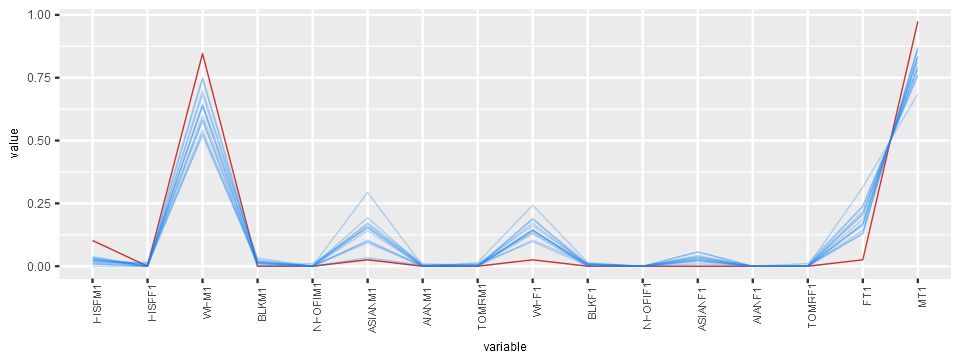

In [77]:
options(repr.plot.width=8, repr.plot.height=3)


ggplot(data.upper_mgmt.melt) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, alpha=factor(class)), size=0.3) +
scale_color_manual(values=PALETTE, guide="none") +
scale_alpha_manual(values=c(0.3, 1), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=6))

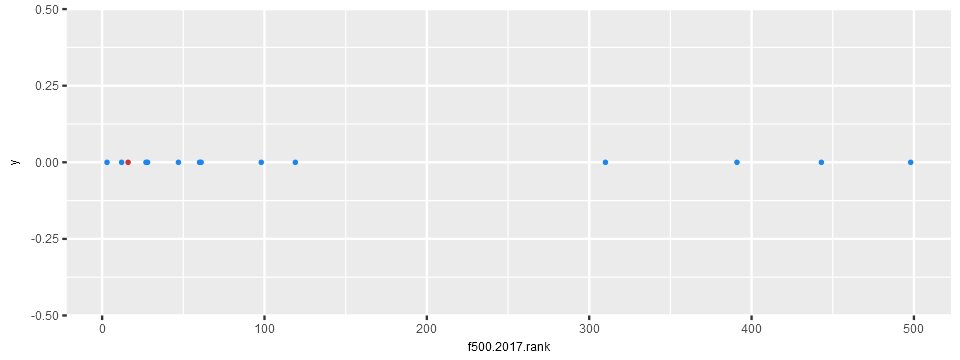

In [71]:
m = Mclust(data.middle_mgmt.prop[, 9:24], G=2)
data.middle_mgmt.prop$class = m$classification

p1 = ggplot(data.middle_mgmt.prop) +
geom_point(aes(x=f500.2017.rank, y=0, color=factor(class)), size=0.5) +
scale_color_manual(values=PALETTE, guide="none")

p1

In [73]:
data.middle_mgmt.melt = melt(data.middle_mgmt.prop[, c(2,25,9:24)], id=c("name","class"))
head(data.middle_mgmt.melt)

name             class variable value        
1 Apple            1     HISPM1_2 0.05009140768
2 Amazon.com       1     HISPM1_2 0.03660179641
3 Costco Wholesale 2     HISPM1_2 0.12430130423
4 Alphabet         1     HISPM1_2 0.03338570306
5 Microsoft        1     HISPM1_2 0.03341955510
6 Intel            1     HISPM1_2 0.04796663191

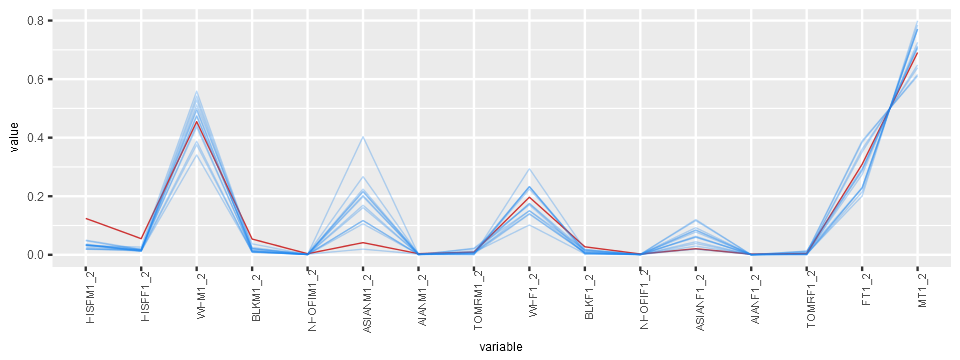

In [74]:
options(repr.plot.width=8, repr.plot.height=3)


ggplot(data.middle_mgmt.melt) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, alpha=factor(class)), size=0.3) +
scale_color_manual(values=PALETTE, guide="none") +
scale_alpha_manual(values=c(0.3, 1), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=6))

Red: lowside WHM1_2 WHF1_2  --- higher WHM1 ASIANM1 WHF1

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$

In [26]:
#mgmt = c(9,10, 21,22, 33,34, 45,46, 57,58, 69,70, 81,82, 93,94, 105,106, 117,118, 129,130, 141,142, 153,154, 165,166, 177,178, 189,190)

#data.mgmt = data.ok[,c(1:8, mgmt)]

#dim(data.mgmt)
#data.mgmt

#data.mgmt.prop = data.mgmt

#for (i in (9:ncol(data.mgmt))) { data.mgmt.prop[,i] = data.mgmt[,i] / (data.ok[,"TOTAL1"] + data.ok[,"TOTAL1_2"]) }

#dim(data.mgmt.prop)
#data.mgmt.prop

[1] 14 40

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPF1 HISPF1_2 WHM1
3   2016      7/1/2016      7/31/2016    2      411      0     149      

[1] 14 40

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1           HISPM1_2     
3   2016      7/1/2016      7/31/2016   0.00024061597690 0.04944658325
12  201

<br>
### Further Reading
___
* Hello

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$